In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('Wine.csv')
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Outlier treatment

Text(0.5, 0.98, 'Box plots of features which are going to be checked for outliers')

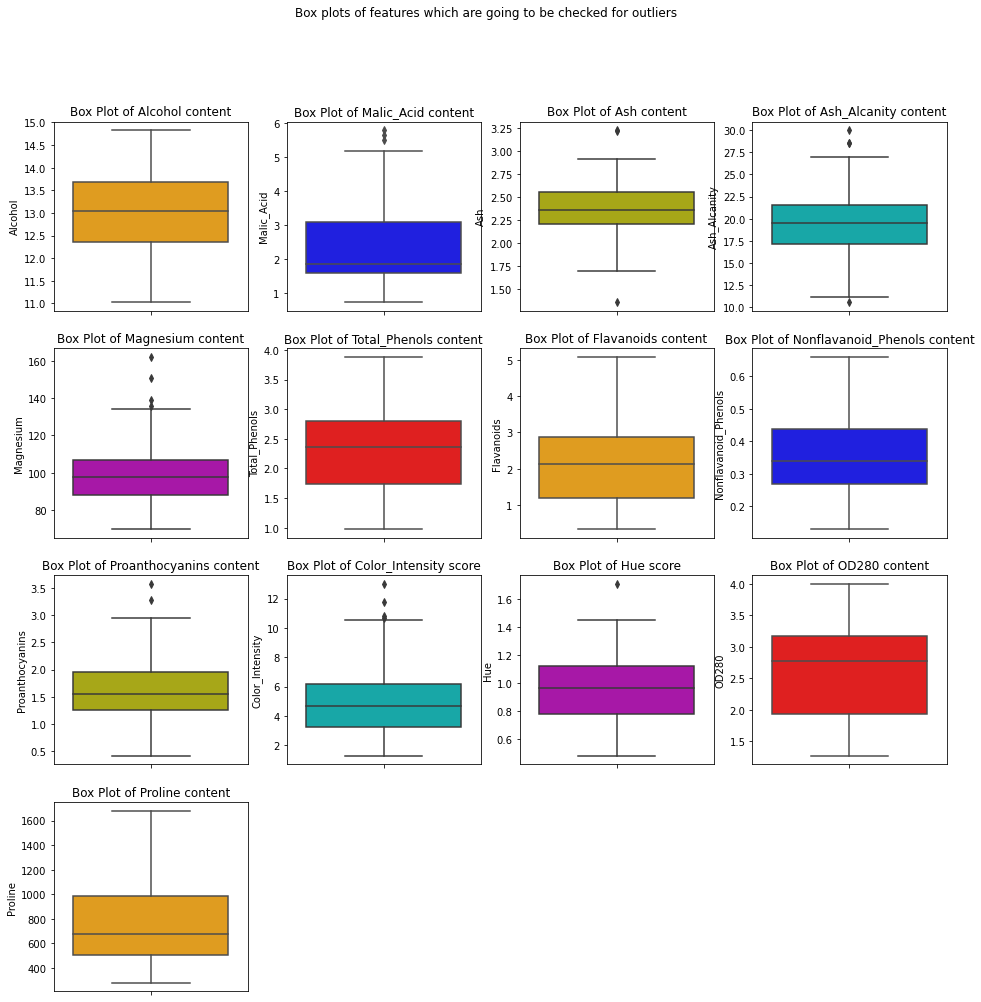

In [9]:
import seaborn as sns
fig,axes = plt.subplots(4,4, figsize=(16,16))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')
axes[-1, -3].axis('off')
sns.boxplot(ax=axes[0,0],data=wine_df,y=wine_df['Alcohol'],color='orange').set_title("Box Plot of Alcohol content")
sns.boxplot(ax=axes[0,1],data=wine_df,y=wine_df['Malic_Acid'],color='b').set_title("Box Plot of Malic_Acid content")
sns.boxplot(ax=axes[0,2],data=wine_df,y=wine_df['Ash'],color='y').set_title("Box Plot of Ash content")
sns.boxplot(ax=axes[0,3],data=wine_df,y=wine_df['Ash_Alcanity'],color='c').set_title("Box Plot of Ash_Alcanity content")
sns.boxplot(ax=axes[1,0],data=wine_df,y=wine_df['Magnesium'],color='m').set_title("Box Plot of Magnesium content")
sns.boxplot(ax=axes[1,1],data=wine_df,y=wine_df['Total_Phenols'],color='r').set_title("Box Plot of Total_Phenols content")
sns.boxplot(ax=axes[1,2],data=wine_df,y=wine_df['Flavanoids'],color='orange').set_title("Box Plot of Flavanoids content")
sns.boxplot(ax=axes[1,3],data=wine_df,y=wine_df['Nonflavanoid_Phenols'],color='b').set_title("Box Plot of Nonflavanoid_Phenols content")
sns.boxplot(ax=axes[2,0],data=wine_df,y=wine_df['Proanthocyanins'],color='y').set_title("Box Plot of Proanthocyanins content")
sns.boxplot(ax=axes[2,1],data=wine_df,y=wine_df['Color_Intensity'],color='c').set_title("Box Plot of Color_Intensity score")
sns.boxplot(ax=axes[2,2],data=wine_df,y=wine_df['Hue'],color='m').set_title("Box Plot of Hue score")
sns.boxplot(ax=axes[2,3],data=wine_df,y=wine_df['OD280'],color='r').set_title("Box Plot of OD280 content")
sns.boxplot(ax=axes[3,0],data=wine_df,y=wine_df['Proline'],color='orange').set_title("Box Plot of Proline content")

fig.suptitle("Box plots of features which are going to be checked for outliers")

**We shall handle outliers for the features Malic acid, Ash content, Ash Alcanity content, Magnesium , Proanthocyanins, Color Intensity and Hue**

In [10]:
wine_df.shape

(178, 13)

In [17]:
import numpy as np
feature=['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']
for i in feature:
    Q1=np.percentile(wine_df[i], 25, interpolation='midpoint')
    Q2=np.percentile(wine_df[i], 50, interpolation='midpoint')
    Q3=np.percentile(wine_df[i], 75, interpolation='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    filt_for_del=(wine_df[i]>up_lim) | (wine_df[i]<low_lim)
    slice_for_del=wine_df.loc[filt_for_del,:]
    index_to_del=slice_for_del.index
    index_to_del_list = index_to_del.to_list()
    wine_df.drop(index_to_del_list, inplace=True)

In [18]:
wine_df.shape

(161, 13)

Text(0.5, 0.98, 'Box plots of features which are going to be checked for outliers')

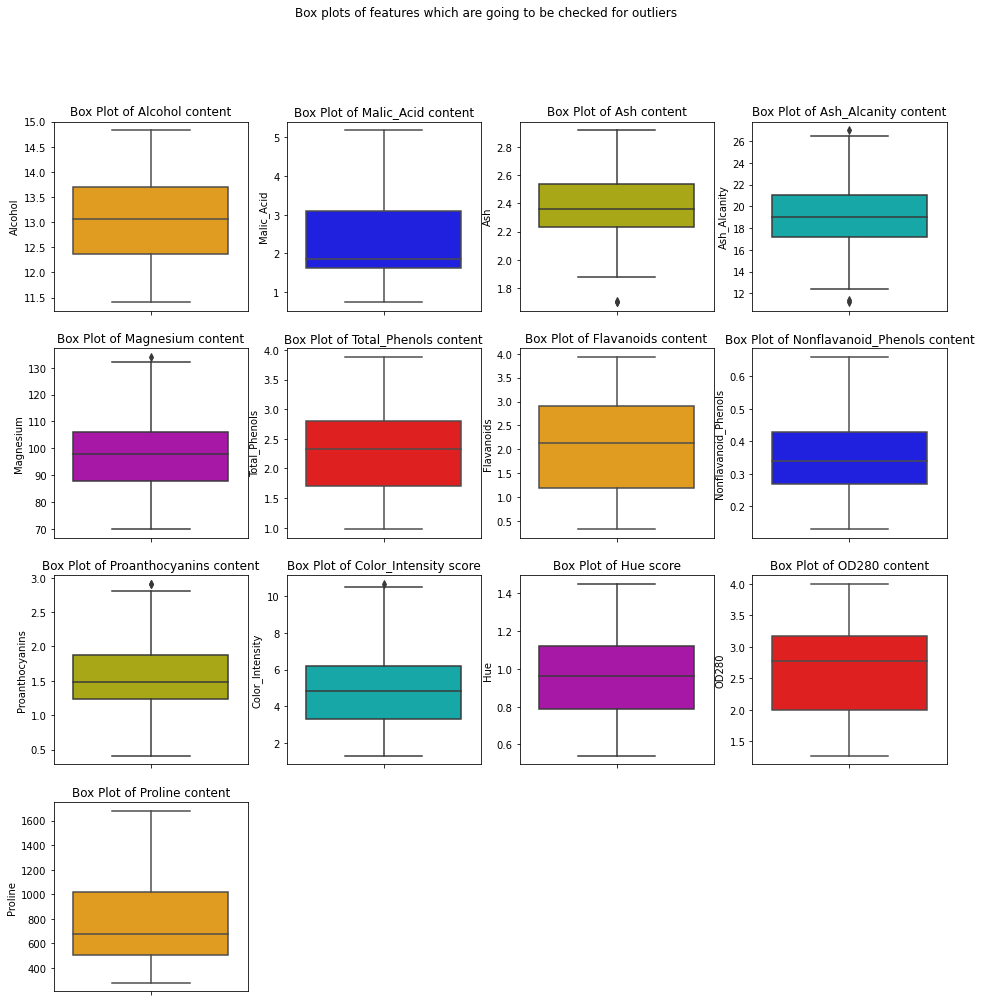

In [19]:
import seaborn as sns
fig,axes = plt.subplots(4,4, figsize=(16,16))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')
axes[-1, -3].axis('off')
sns.boxplot(ax=axes[0,0],data=wine_df,y=wine_df['Alcohol'],color='orange').set_title("Box Plot of Alcohol content")
sns.boxplot(ax=axes[0,1],data=wine_df,y=wine_df['Malic_Acid'],color='b').set_title("Box Plot of Malic_Acid content")
sns.boxplot(ax=axes[0,2],data=wine_df,y=wine_df['Ash'],color='y').set_title("Box Plot of Ash content")
sns.boxplot(ax=axes[0,3],data=wine_df,y=wine_df['Ash_Alcanity'],color='c').set_title("Box Plot of Ash_Alcanity content")
sns.boxplot(ax=axes[1,0],data=wine_df,y=wine_df['Magnesium'],color='m').set_title("Box Plot of Magnesium content")
sns.boxplot(ax=axes[1,1],data=wine_df,y=wine_df['Total_Phenols'],color='r').set_title("Box Plot of Total_Phenols content")
sns.boxplot(ax=axes[1,2],data=wine_df,y=wine_df['Flavanoids'],color='orange').set_title("Box Plot of Flavanoids content")
sns.boxplot(ax=axes[1,3],data=wine_df,y=wine_df['Nonflavanoid_Phenols'],color='b').set_title("Box Plot of Nonflavanoid_Phenols content")
sns.boxplot(ax=axes[2,0],data=wine_df,y=wine_df['Proanthocyanins'],color='y').set_title("Box Plot of Proanthocyanins content")
sns.boxplot(ax=axes[2,1],data=wine_df,y=wine_df['Color_Intensity'],color='c').set_title("Box Plot of Color_Intensity score")
sns.boxplot(ax=axes[2,2],data=wine_df,y=wine_df['Hue'],color='m').set_title("Box Plot of Hue score")
sns.boxplot(ax=axes[2,3],data=wine_df,y=wine_df['OD280'],color='r').set_title("Box Plot of OD280 content")
sns.boxplot(ax=axes[3,0],data=wine_df,y=wine_df['Proline'],color='orange').set_title("Box Plot of Proline content")

fig.suptitle("Box plots of features which are going to be checked for outliers")

# Heatmap

<AxesSubplot:>

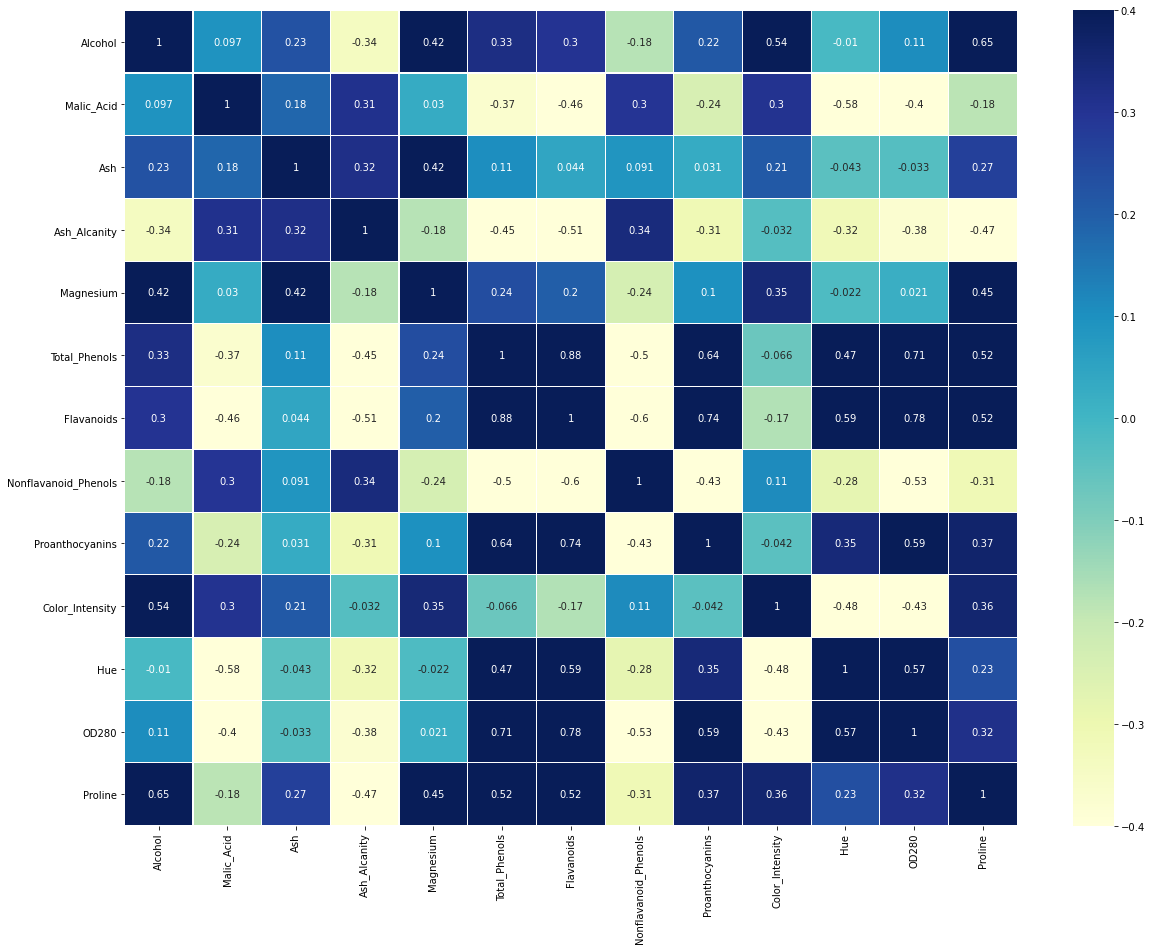

In [22]:
corrmatrix=wine_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='YlGnBu')

# Feature reduction
**From the heatmap, it is seen that Total_Phenols is highly correlated to OD280(0.71), Proline(0.52), Flavonoids(0.88), and Proanthocyanins(0.64). Let us drop this feature and construct heatmap again**

In [23]:
wine_df.drop('Total_Phenols',axis=1,inplace=True)

<AxesSubplot:>

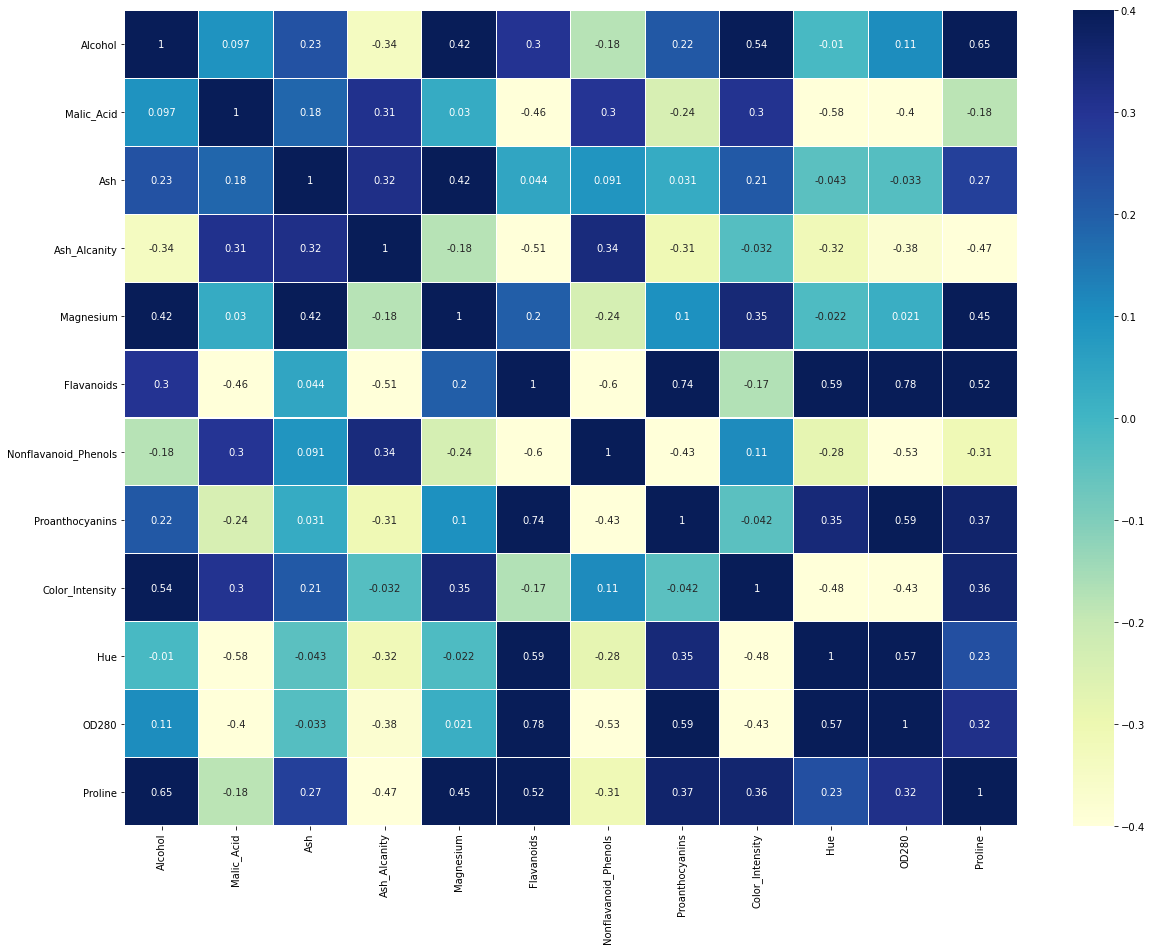

In [24]:
corrmatrix=wine_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='YlGnBu')

**Again, we can still see high correlation between the feature 'Flavanoids' and Proanthocyanins(0.74), Hue(0.59), OD280(0.78), and Proline(0.52). So let us go ahead and drop 'Flavanoids'. Similar observation is to be made of the feature 'Alcohol', so we shall drop these two and proceed**

In [26]:
wine_df.drop(['Flavanoids','Alcohol'],axis=1,inplace=True)

<AxesSubplot:>

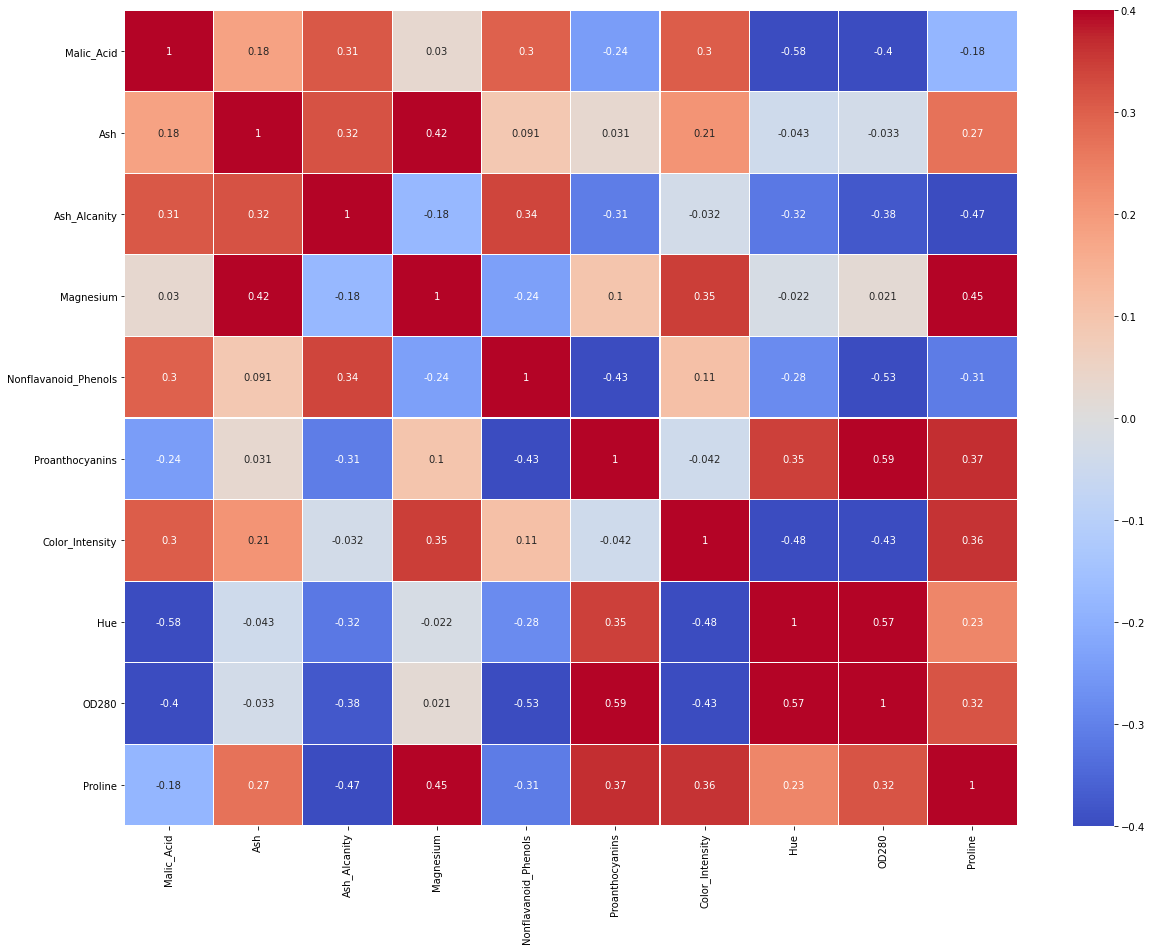

In [27]:
corrmatrix=wine_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='coolwarm')

**Again, we can still see high correlation between the feature 'OD280' and Proanthocyanins(0.59), Hue(0.57), Nonflavanoid_phenols(-0.53), and Ash_Alcanity(-0.38). So let us go ahead and drop 'OD280'. Similar is the case with the feature 'Proline' which is highly correlated with Magnesium(0.45) and Ash_Alcanity(-0.47). We will drop this too here.**

In [28]:
wine_df.drop(['OD280','Proline'],axis=1,inplace=True)

<AxesSubplot:>

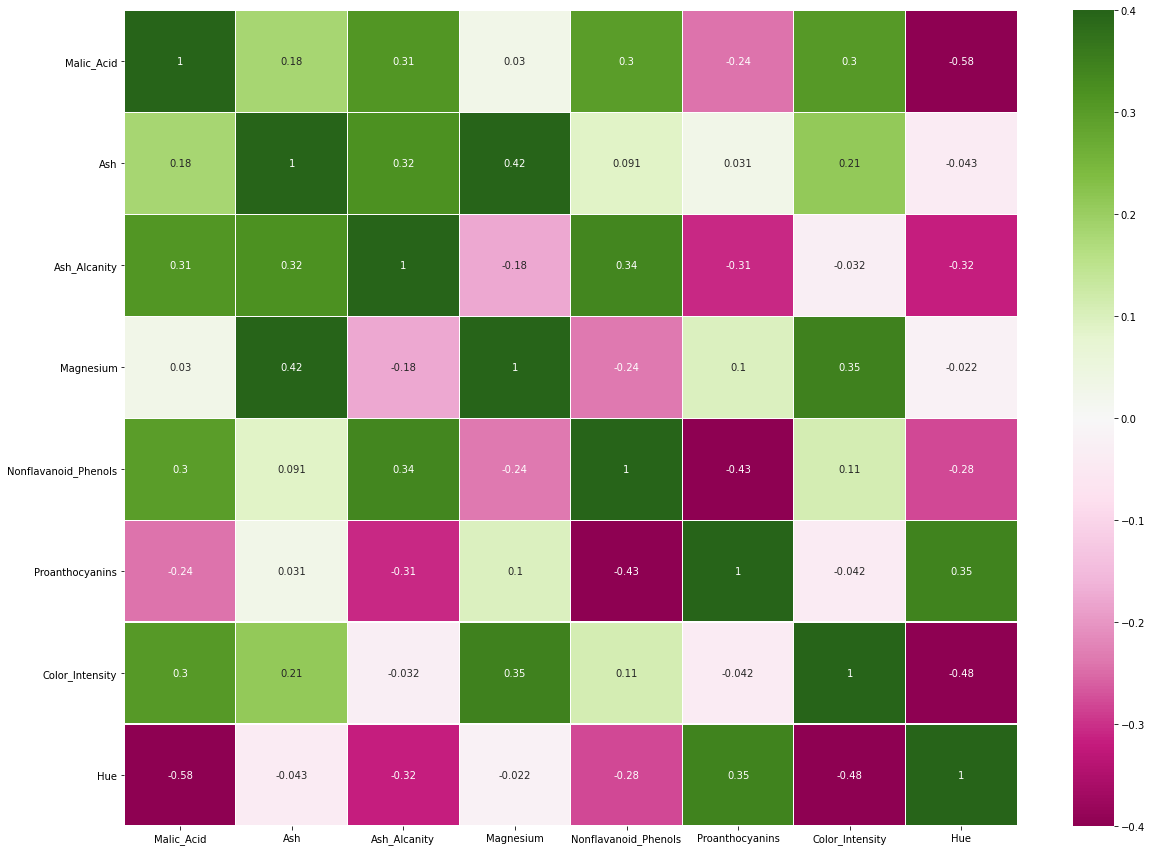

In [29]:
corrmatrix=wine_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='PiYG')

**Lastly, we can also see the high correlation between Nonflavanoid_Phenols and Proanthocyanins; so, we drop Proanthocyanins, and also, Hue has high correlation with many other features; so we remove Hue**

In [30]:
wine_df.drop(['Nonflavanoid_Phenols','Hue'],axis=1,inplace=True)

<AxesSubplot:>

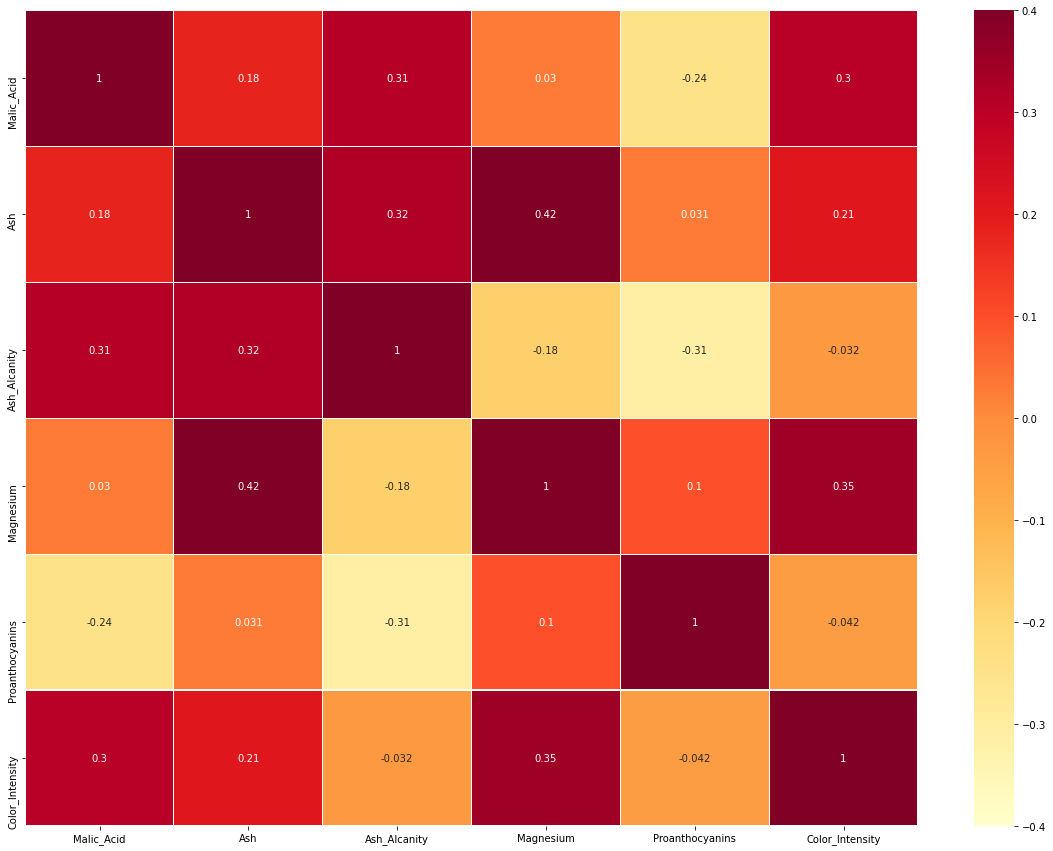

In [32]:
corrmatrix=wine_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='YlOrRd')

**Now let us use normalization, and proceed with the clustering**

# KMeans

In [33]:
from sklearn import preprocessing
X=preprocessing.normalize(wine_df)

In [34]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.023256,0.023668,0.194693,0.977775,0.015435,0.049720
std,0.011080,0.002776,0.040058,0.008504,0.005409,0.020393
min,0.008170,0.017230,0.102419,0.946555,0.003771,0.014355
25%,0.015373,0.021779,0.163841,0.971379,0.011488,0.033585
50%,0.018716,0.023651,0.190951,0.978625,0.015400,0.046444
75%,0.029984,0.025711,0.221717,0.983942,0.018665,0.059513
max,0.060874,0.031101,0.319124,0.993150,0.034281,0.112979


C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.36041428478940907
0.17438841999944202
0.13421371612137203
0.09654014427006274
0.08096604989176419
0.07122915025116423
0.06423397589137593
0.057341778224234224
0.05281840537506654
0.048459621150661346


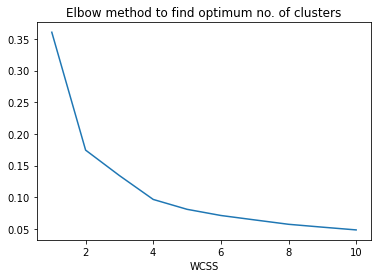

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method to find optimum no. of clusters')
plt.xlabel('WCSS')
plt.show()

**The optimum number of clusters for KMeans is 2; proceeding with the model creation**

In [36]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
y_means=kmeans.fit_predict(X)
Categ_df=pd.DataFrame(data=y_means,columns=["Category"])
KMeansFinal_df=wine_df.join(Categ_df)

In [38]:
KMeansFinal_df['Category'].value_counts()

1.0    76
0.0    69
Name: Category, dtype: int64

# According to the manual preprocessing, according to KMeans, we have 2 categories and excluding outlier datapoints, the count in Category '1' is 76, and in Category '0' is 69

# Agglomerative HC

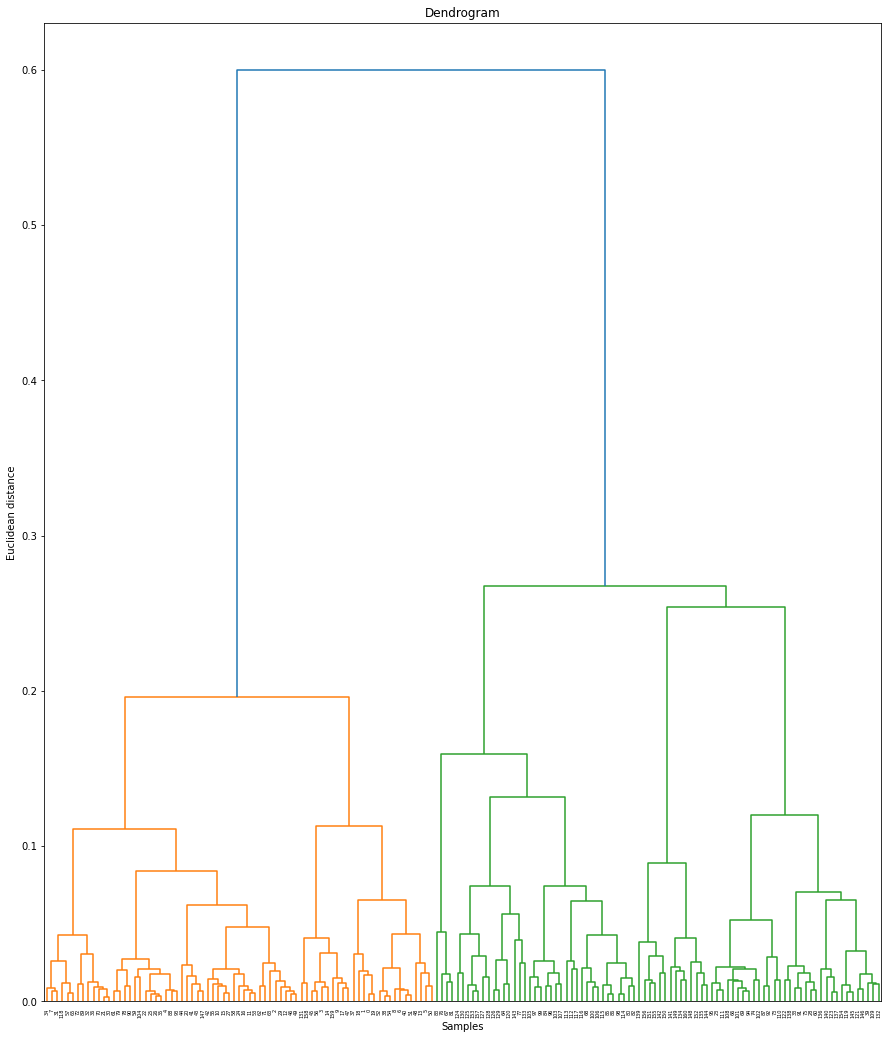

In [39]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,18))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
#plt.hlines(0.5,0,5000, colors="r", linestyles="dashed")
#plt.hlines(0.08,0,5000, colors="r", linestyles="dashed")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
CategHC_2_df=pd.DataFrame(data=y_hc,columns=["Category_HC_2"])
Final_HC_2_df=wine_df.join(CategHC_2_df)
Final_HC_2_df["Category_HC_2"].value_counts()

0.0    76
1.0    69
Name: Category_HC_2, dtype: int64

In [42]:
pd.crosstab(KMeansFinal_df['Category'],Final_HC_2_df["Category_HC_2"])

Category_HC_2,0.0,1.0
Category,,
0.0,69,0
1.0,7,69


# Using agglomerative HC, we see that the counts are exactly the same as KMeans, but it appears that the label(0 and 1) has been assigned differently(flipped) in AHC as compared to KMeans